In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2

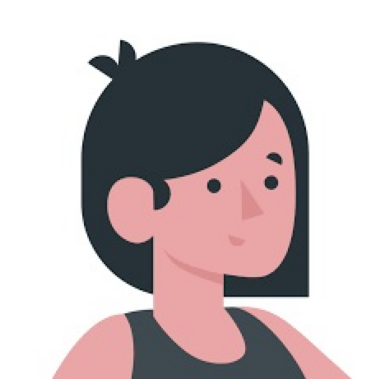

In [3]:
img = mpimg.imread('girl3.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
X = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

In [6]:
labels_reshaped = labels.reshape(img.shape[0], img.shape[1])

In [7]:
cluster_to_remove = 2 # Màu đen
mask = (labels_reshaped != cluster_to_remove).astype(np.uint8)
img_with_clusters = np.copy(img)


In [14]:
img_with_clusters[labels_reshaped == cluster_to_remove] = [0, 0, 0]
segmented_img_with_alpha = np.dstack((img_with_clusters, mask * 255))
final = cv2.imwrite('girl_transparent.png', cv2.cvtColor(segmented_img_with_alpha, cv2.COLOR_RGBA2BGRA))